# Task 1.1 Data Cleaning & Understanding

In [203]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats import pearsonr

## Dataset Loading

In [204]:
df_incidents = pd.read_csv('datasets_original/incidents.csv', sep=',', index_col=False, low_memory=False) # gun incidents in the USA
# Note: since the first column isn't a column of indexes (it's the date column), we set index_col=False

df_poverty = pd.read_csv('datasets_original/povertyByStateYear.csv', sep=',', index_col=False) # poverty percentage in the USA
# Note: the first column isn't a column of indexes

df_elections = pd.read_csv('datasets_original/year_state_district_house.csv', sep=',', index_col=False) # congressional elections in the USA
# Note: the first column isn't a column of indexes

In [205]:
print(df_incidents.head())

         date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0                    2.0   
3     

In [206]:
print(df_poverty.head())

           state  year  povertyPercentage
0  United States  2020               11.5
1        Alabama  2020               14.8
2         Alaska  2020               11.5
3        Arizona  2020               12.1
4       Arkansas  2020               15.8


In [207]:
print(df_elections.head())

   year    state  congressional_district       party  candidatevotes  \
0  1976  ALABAMA                       1  REPUBLICAN           98257   
1  1976  ALABAMA                       2  REPUBLICAN           90069   
2  1976  ALABAMA                       3    DEMOCRAT          106935   
3  1976  ALABAMA                       4    DEMOCRAT          141490   
4  1976  ALABAMA                       5    DEMOCRAT          113553   

   totalvotes  
0      157170  
1      156362  
2      108048  
3      176022  
4      113560  


## Basic Statistics

In [264]:
print("Info about df_incidents: \n")
df_incidents.info(null_counts=False)

Info about df_incidents: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239381 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date                       datetime64[ns]
 1   state                      object        
 2   city_or_county             string        
 3   address                    string        
 4   latitude                   float64       
 5   longitude                  float64       
 6   congressional_district     Int64         
 7   state_house_district       float64       
 8   state_senate_district      float64       
 9   participant_age1           float64       
 10  participant_age_group1     string        
 11  participant_gender1        string        
 12  min_age_participants       float64       
 13  avg_age_participants       float64       
 14  max_age_participants       float64       
 15  n_participants_child       Float64       
 16  n_participa

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_16720\1662567342.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_incidents.info(null_counts=False)


In [209]:
df_incidents.n_participants_teen.unique()

array(['0.0', nan, '1.0', '2.0', '3.0', '4.0', '5.0', '15.0', '-864',
       '6.0', '7.0', '762487', '-753', '-854', '444036', '-138', '10.0',
       'ymwa4vyx', '9.0', '27.0', 'akendyt6a', '-927', '-130',
       'x2aqam13iy', '445652', 'eqsa', '8.0', '-49', 'nt082ps', '-873',
       '-427', '-947', 'wcrt3x4', 'p2eyl'], dtype=object)

In [210]:
print("Info about df_poverty: \n")
df_poverty.info()

Info about df_poverty: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [211]:
print("Info about df_elections: \n")
df_elections.info()

Info about df_elections: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


In [212]:
df_incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


In [213]:
df_poverty.describe()

,year,povertyPercentage
count,884.000000,832.000000
mean,2011.998869,12.535817
std,4.902330,3.205233
min,2004.000000,5.400000
25%,2008.000000,10.200000
50%,2012.000000,12.000000
75%,2016.000000,14.700000
max,2020.000000,21.800000


In [214]:
df_elections.describe()

,year,congressional_district,candidatevotes,totalvotes
count,10441.000000,10441.000000,1.044100e+04,1.044100e+04
mean,1999.002011,9.873096,1.345276e+05,2.076422e+05
std,13.845898,10.017078,5.160721e+04,8.262643e+04
min,1976.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,1988.000000,3.000000,1.004870e+05,1.554510e+05
50%,2000.000000,6.000000,1.290850e+05,2.004450e+05
75%,2012.000000,13.000000,1.653710e+05,2.555770e+05
max,2022.000000,53.000000,1.165136e+06,2.656104e+06


In [215]:
# Here we justify why the date column in df_incidents can't be used as index column

print("Number of distinct values in 'date': \t", df_incidents.date.nunique())

# Since there are 239677 incidents, and it turns out that there are 2437 distinct dates, we deduce that on certain dates multiple incidents occurred. In conclusion, the dates are not a unique identifier for the incidents.

Number of distinct values in 'date': 	 2437


In [216]:
# Missing values detection
# print the n. of missing values for each attribute


In [217]:
df_poverty.isnull().any()

state                False
year                 False
povertyPercentage     True
dtype: bool

In [218]:
df_elections.isnull().any()

year                      False
state                     False
congressional_district    False
party                     False
candidatevotes            False
totalvotes                False
dtype: bool

## Data Cleaning

### Deduplication

In the first place we want to see if there are duplicate rows in the datasets.

In [219]:
# We want to see if there are duplicate rows in df_incidents
df_incidents[df_incidents.duplicated()]

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
6750,2015-04-27,California,Oakland,1 Airport Drive,37.7116,-122.2120,13.0,18.0,9.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,Non-Shooting Incident,TSA Action
10912,2015-06-24,Texas,San Antonio,9800 Airport Boulevard,29.5217,-98.4767,21.0,121.0,25.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,Non-Shooting Incident,TSA Action
17801,2015-09-13,Texas,Houston,2800 North Terminal Road,29.9872,-95.3477,18.0,141.0,15.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,TSA Action,NaN
23135,2015-07-15,Texas,Dallas (Dfw Airport),3200 E Airfield Dr,32.8748,-97.0144,24.0,115.0,16.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,Non-Shooting Incident,TSA Action
27214,2015-02-12,Texas,Dallas,8008 Cedar Springs Rd,32.8410,-96.8486,30.0,103.0,16.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,Dallas Love Field Airport,Non-Shooting Incident,TSA Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237755,2015-12-29,District of Columbia,Washington,NaN,38.9075,-77.0176,1.0,NaN,NaN,NaN,...,NaN,NaN,0,0,1.0,0.0,1.0,NaN,Non-Shooting Incident,Possession (gun(s) found during commission of ...
238138,2016-02-19,Maryland,Baltimore,PO BOX 8766,39.1841,-76.6711,3.0,32.0,32.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,Non-Shooting Incident,TSA Action
239260,2015-01-14,Oklahoma,Oklahoma City,7100 Terminal Dr,35.3953,-97.5966,5.0,90.0,44.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,Will Rogers World Airport,TSA Action,NaN
239354,2030-04-03,New York,Rochester,1200 Brooks Ave,43.1309,-77.6696,25.0,137.0,56.0,NaN,...,1.0,0.0,0,0,0.0,1.0,1.0,TSA,Non-Shooting Incident,TSA Action


In [0]:
df_incidents.drop_duplicates(inplace=True) # we drop the duplicated rows from the dataframe.

Now there are no duplicate rows anymore, as we can check:

In [220]:
df_incidents[df_incidents.duplicated()]

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2


### Dtype casting
Now, we convert attributes in the desired data type.


##### cast the date column to datetime type

In [221]:
df_incidents.date=pd.to_datetime(df_incidents.date) # we convert the date column to datetime type
print(pd.DatetimeIndex(df_incidents.date).year.unique()) # we check that the year column is correct
print(pd.DatetimeIndex(df_incidents.date).month.unique()) # we check that the month column is correct
print(pd.DatetimeIndex(df_incidents.date).day.unique()) # we check that the day column is correct


Int64Index([2015, 2017, 2016, 2030, 2014, 2018, 2029, 2013, 2028], dtype='int64', name='date')
Int64Index([5, 4, 11, 10, 6, 1, 3, 8, 12, 2, 7, 9], dtype='int64', name='date')
Int64Index([ 2,  3,  5, 15, 14, 18, 25, 16,  1, 22, 19, 21,  6, 17, 26, 11, 27,
             8, 30, 13, 23,  7,  4,  9, 28, 29, 24, 20, 12, 10, 31],
           dtype='int64', name='date')


#### cast the geographical info columns to string type

df_incidents.state= df_incidents.state.astype('string')
df_incidents.state.unique() 

In [222]:
df_incidents.city_or_county= df_incidents.city_or_county.astype('string')
df_incidents.address= df_incidents.address.astype('string')

In [223]:
df_incidents.congressional_district= df_incidents.congressional_district.astype('Int64')

In [224]:
print(df_incidents.participant_age_group1.unique())
df_incidents.participant_age_group1= df_incidents.participant_age_group1.astype('string')

['Adult 18+' nan 'Teen 12-17' 'Child 0-11']


In [225]:
print(df_incidents.participant_gender1.unique())
# print how many of each value there are
print(df_incidents.participant_gender1.value_counts()) # there is only one that is labelled 'Male, female'
df_incidents.participant_gender1= df_incidents.participant_gender1.astype('string')
print(df_incidents.participant_gender1.unique())


['Male' nan 'Female' 'Male, female']
Male            177899
Female           25366
Male, female         1
Name: participant_gender1, dtype: int64
<StringArray>
['Male', <NA>, 'Female', 'Male, female']
Length: 4, dtype: string


#### cast the number of killed and injured to int type

In [226]:
# convert the ages that are strings to nan and cast the ages to float
def convert_to_float(x):
    """
    This function converts a string to float if possible, and to NaN otherwise.
    """
    try:
        return float(x)
          
    except ValueError:
        return np.nan

df_incidents.min_age_participants=df_incidents.min_age_participants.apply(lambda x: convert_to_float(x))
# same for max_age and avg_age
df_incidents.max_age_participants=df_incidents.max_age_participants.apply(lambda x: convert_to_float(x))
df_incidents.avg_age_participants=df_incidents.avg_age_participants.apply(lambda x: convert_to_float(x))

0      19.0
1      62.0
2       NaN
3    707477
4       NaN
Name: avg_age_participants, dtype: object
0        19.0
1        62.0
2         NaN
3    707477.0
4         NaN
Name: avg_age_participants, dtype: float64


#### cast the number of participants to int type

In [227]:
# we see the values for n_participants_child, teen and adult
print(df_incidents.n_participants_child.unique())
print(df_incidents.n_participants_teen.unique())
print(df_incidents.n_participants_adult.unique())

# convert the values that are strings to nan
df_incidents.n_participants_child=df_incidents.n_participants_child.apply(lambda x: convert_to_float(x))
df_incidents.n_participants_child= df_incidents.n_participants_child.astype('Float64')

df_incidents.n_participants_teen=df_incidents.n_participants_teen.apply(lambda x: convert_to_float(x))
df_incidents.n_participants_teen= df_incidents.n_participants_teen.astype('Float64')

df_incidents.n_participants_adult=df_incidents.n_participants_adult.apply(lambda x: convert_to_float(x))
df_incidents.n_participants_adult= df_incidents.n_participants_adult.astype('Float64')
print('converted values')
print(df_incidents.n_participants_child.unique())

['0.0' nan '1.0' '2.0' '3.0' '835473' '5.0' '4.0' '124130.0' '436587'
 '6yb1lceu3v' '6.0' '7.0' '886365.0' 'z6sp' '607874' '292381' '-73' '11.0'
 '25yerfqn6' '8.0' '-977.0' '77mw3iw3' '-884.0' 'j34' '-252.0']
['0.0' nan '1.0' '2.0' '3.0' '4.0' '5.0' '15.0' '-864' '6.0' '7.0'
 '762487' '-753' '-854' '444036' '-138' '10.0' 'ymwa4vyx' '9.0' '27.0'
 'akendyt6a' '-927' '-130' 'x2aqam13iy' '445652' 'eqsa' '8.0' '-49'
 'nt082ps' '-873' '-427' '-947' 'wcrt3x4' 'p2eyl']
['1.0' nan '5.0' '0.0' '3.0' '4.0' '2.0' '6.0' '7.0' '8.0' '10.0' '9.0'
 '28.0' '24.0' '12.0' '17.0' '13.0' '33.0' '16.0' '15.0' '638402.0' '11.0'
 '425457' '29.0' '18.0' '-496' '20.0' '21.0' 'ipw' '14.0' '32.0' '-991'
 '5uw' '-673' '22.0' '27.0' '-267' '19.0' '686533' '479961' '30.0'
 '298481' '63.0' '-601' '-918' '-622' 'jbpiz8upz' '25.0' '827900' '-355.0'
 '103.0']
converted values
<FloatingArray>
[     0.0,     <NA>,      1.0,      2.0,      3.0, 835473.0,      5.0,
      4.0, 124130.0, 436587.0,      6.0,      7.0, 886365.0

In [228]:
#print(df_incidents.incident_characteristics1.value_counts())
#print(df_incidents.incident_characteristics2.value_counts())
# TODO: spostare

In [229]:
df_poverty.state= df_poverty.state.astype('string') 
print(df_poverty.state.unique())


<StringArray>
[       'United States',              'Alabama',               'Alaska',
              'Arizona',             'Arkansas',           'California',
             'Colorado',          'Connecticut',             'Delaware',
 'District of Columbia',              'Florida',              'Georgia',
               'Hawaii',                'Idaho',             'Illinois',
              'Indiana',                 'Iowa',               'Kansas',
             'Kentucky',            'Louisiana',                'Maine',
             'Maryland',        'Massachusetts',             'Michigan',
            'Minnesota',          'Mississippi',             'Missouri',
              'Montana',             'Nebraska',               'Nevada',
        'New Hampshire',           'New Jersey',           'New Mexico',
             'New York',       'North Carolina',         'North Dakota',
                 'Ohio',             'Oklahoma',               'Oregon',
         'Pennsylvania',         'Rho

In [230]:
df_elections.state= df_elections.state.astype('string')
df_elections.party= df_elections.party.astype('string')

In [231]:
df_incidents.min_age_participants[df_incidents.min_age_participants>1000000 ]

70729     7.000000e+06
113856    9.000000e+11
Name: min_age_participants, dtype: float64

### Incoherent data 
Now, we fix data that are clearly non-coherent, for example negative ages or too big number.

#### Years of the incidents

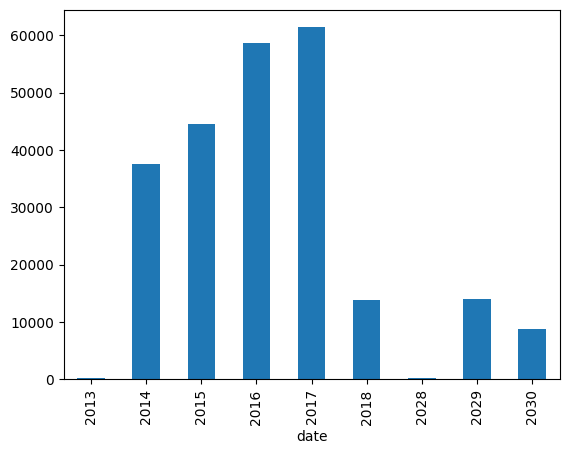

In [243]:
# We want to identify the dates in df_incidents that are erroneous

df_incidents.date.groupby(df_incidents.date.dt.year).count().plot(kind='bar')
plt.show()


From the  histogram we deduce that there are some incidents that should have happened after 2023 (the year we are in), so it is certainly impossible for us to have this data today

#### Ages of the participants

In [258]:
# We replace the ages that are negative with NaN
df_incidents.min_age_participants[df_incidents.min_age_participants<0] = np.nan
df_incidents.max_age_participants[df_incidents.max_age_participants<0] = np.nan
df_incidents.avg_age_participants[df_incidents.avg_age_participants<0] = np.nan
# We replace the ages that are too big with NaN
df_incidents.min_age_participants[df_incidents.min_age_participants>100] = np.nan
df_incidents.max_age_participants[df_incidents.max_age_participants>100] = np.nan
df_incidents.avg_age_participants[df_incidents.avg_age_participants>100] = np.nan


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_16720\1121726953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidents.min_age_participants[df_incidents.min_age_participants<0] = np.nan
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_16720\1121726953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidents.max_age_participants[df_incidents.max_age_participants<0] = np.nan
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_16720\1121726953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

#### Number of participants

In [234]:
print(f'maximum number of participants {df_incidents.n_participants.max()}, minimum number of participants {df_incidents.n_participants.min()}')
print(f'maximum number of participants_child {df_incidents.n_participants_child.max()}, minimum number of participants_child {df_incidents.n_participants_child.min()}')
print(f'maximum number of participants_teen {df_incidents.n_participants_teen.max()}, minimum number of participants_teen {df_incidents.n_participants_teen.min()}')
print(f'maximum number of participants_adult {df_incidents.n_participants_adult.max()}, minimum number of participants_adult {df_incidents.n_participants_adult.min()}')

maximum number of participants 103.0, minimum number of participants 0.0
maximum number of participants_child 886365.0, minimum number of participants_child -977.0
maximum number of participants_teen 762487.0, minimum number of participants_teen -947.0
maximum number of participants_adult 827900.0, minimum number of participants_adult -991.0


The number of participants seems correct, but the numver of children, teens and adults is not correct, since there are negative or too big numbers ($>103$). For now we replace them with NaN.

In [246]:
df_incidents.n_participants_child[df_incidents.n_participants_child<0] = np.nan
df_incidents.n_participants_teen[df_incidents.n_participants_teen<0] = np.nan
df_incidents.n_participants_adult[df_incidents.n_participants_adult<0] = np.nan
df_incidents.n_participants_child[df_incidents.n_participants_child>103] = np.nan
df_incidents.n_participants_teen[df_incidents.n_participants_teen>103] = np.nan
df_incidents.n_participants_adult[df_incidents.n_participants_adult>103] = np.nan

#### Number of killed and injured

In [266]:
print(f'maximum number of killed {df_incidents.n_killed.max()}, minimum number of killed {df_incidents.n_killed.min()}')
print(f'maximum number of injured {df_incidents.n_injured.max()}, minimum number of injured {df_incidents.n_injured.min()}')
print(f'maximum number of arrested {df_incidents.n_arrested.max()}, minimum number of arrested {df_incidents.n_arrested.min()}')
print(f'maximum numbber of hunarmed {df_incidents.n_unharmed.max()}, minimum number of unharmed {df_incidents.n_unharmed.min()}')


maximum number of killed 50, minimum number of killed 0
maximum number of injured 53, minimum number of injured 0
maximum number of arrested 63.0, minimum number of arrested 0.0
maximum numbber of hunarmed 20.0, minimum number of unharmed 0.0


The number of killed and injuried  seems reasonable, so we don't change anything.

### Poverty

In [236]:
print("Distinct Values in state: \t", df_poverty.state.unique())
print("total n. of states: \t\t", df_poverty.state.nunique())

Distinct Values in state: 	 <StringArray>
[       'United States',              'Alabama',               'Alaska',
              'Arizona',             'Arkansas',           'California',
             'Colorado',          'Connecticut',             'Delaware',
 'District of Columbia',              'Florida',              'Georgia',
               'Hawaii',                'Idaho',             'Illinois',
              'Indiana',                 'Iowa',               'Kansas',
             'Kentucky',            'Louisiana',                'Maine',
             'Maryland',        'Massachusetts',             'Michigan',
            'Minnesota',          'Mississippi',             'Missouri',
              'Montana',             'Nebraska',               'Nevada',
        'New Hampshire',           'New Jersey',           'New Mexico',
             'New York',       'North Carolina',         'North Dakota',
                 'Ohio',             'Oklahoma',               'Oregon',
         

### Elections

In [240]:
print("Distinct Values in state: \t", df_elections.state.unique())

Distinct Values in state: 	 <StringArray>
[             'ALABAMA',               'ALASKA',              'ARIZONA',
             'ARKANSAS',           'CALIFORNIA',             'COLORADO',
          'CONNECTICUT',             'DELAWARE',              'FLORIDA',
              'GEORGIA',               'HAWAII',                'IDAHO',
             'ILLINOIS',              'INDIANA',                 'IOWA',
               'KANSAS',             'KENTUCKY',            'LOUISIANA',
                'MAINE',             'MARYLAND',        'MASSACHUSETTS',
             'MICHIGAN',            'MINNESOTA',          'MISSISSIPPI',
             'MISSOURI',              'MONTANA',             'NEBRASKA',
               'NEVADA',        'NEW HAMPSHIRE',           'NEW JERSEY',
           'NEW MEXICO',             'NEW YORK',       'NORTH CAROLINA',
         'NORTH DAKOTA',                 'OHIO',             'OKLAHOMA',
               'OREGON',         'PENNSYLVANIA',         'RHODE ISLAND',
       'S

In [241]:
print("Distinct Values in state: \t", df_elections.state.nunique())
# There is an erroneous instance: 'DISTRICT OF COLUMBIA'

Distinct Values in state: 	 51


## Data Exploration

Before dealing with the missing values, we should explore the data to understand how to fill them.

### Distributions

### Ages

<Axes: >

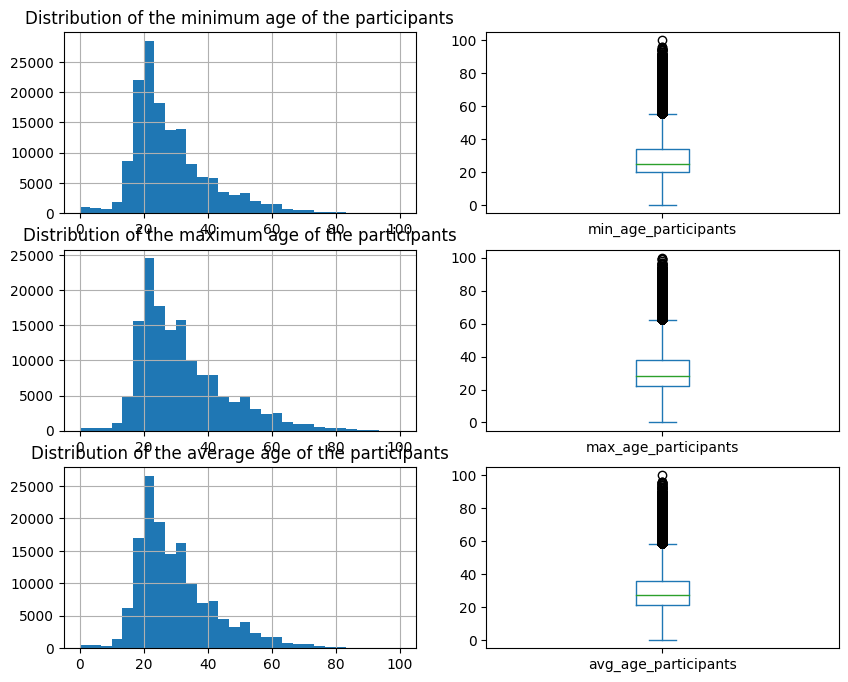

In [300]:
# plot the distribution of the ages with a line plot
fig, ax = plt.subplots(3,2)
# adjust the size of the figure
fig.set_figheight(8)
fig.set_figwidth(10)
df_incidents.min_age_participants.hist(ax=ax[0,0], bins=30)
ax[0,0].set_title('Distribution of the minimum age of the participants')
df_incidents.max_age_participants.hist(ax=ax[1,0], bins=30)
ax[1,0].set_title('Distribution of the maximum age of the participants')
df_incidents.avg_age_participants.hist(ax=ax[2,0], bins=30)
ax[2,0].set_title('Distribution of the average age of the participants')
# box plots
df_incidents.min_age_participants.plot.box(ax=ax[0,1])
df_incidents.max_age_participants.plot.box(ax=ax[1,1])
df_incidents.avg_age_participants.plot.box(ax=ax[2,1])



number of outliers for min_age_participants: 6303


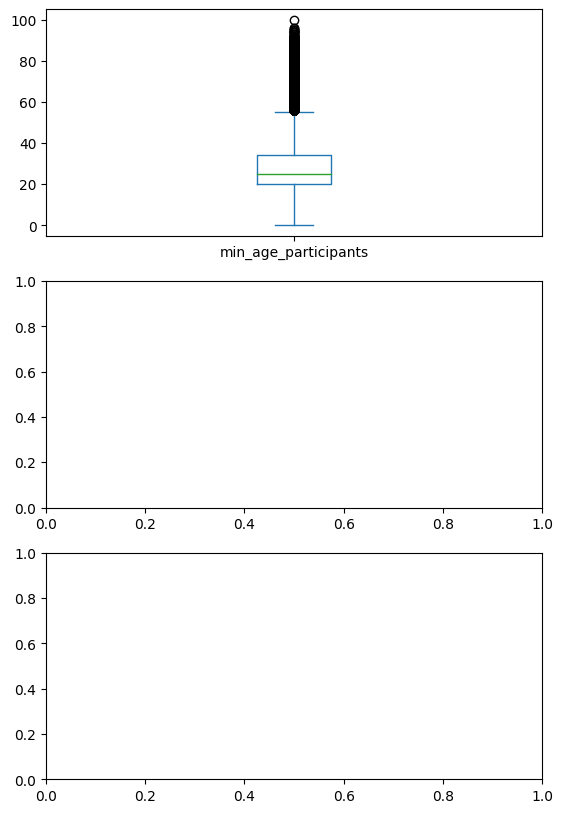

In [291]:
# plot the distribution of the ages with a box plot
fig, ax = plt.subplots(3,1)
# adjust the size of the figure
fig.set_figheight(10)
df_incidents.min_age_participants.plot.box(ax=ax[0])
# compute how many outliers are out of the fences


In [ ]:
df_incidents['n_killed'].value_counts().plot(kind='bar', title='Number of killed')
plt.show()

In [ ]:
# plot the distribution of the number of killed people > 3
df_incidents[df_incidents.n_killed > 3].n_killed.value_counts().plot(kind='bar', title='Number of killed > 3')

## Correlations

We wanna first see if there is a correlations between the poverty of the state and the number of gun incidents.

In [ ]:
# show incidents happened in 2014
df_incidents_2014=df_incidents[df_incidents.date.dt.year == 2014]
# new df with total number of incidents per state
df_incidents_2014_state = df_incidents_2014.groupby('state').size().reset_index(name='total_incidents')

In [ ]:
df_incidents_2014_state


In [ ]:
for state in df_incidents_2014_state.state:
    df_incidents_2014_state.loc[df_incidents_2014_state.state == state, 'povertyPercentage'] = \
        df_poverty[df_poverty.year==2014][df_poverty.state == state].povertyPercentage.values[0]

In [ ]:
df_incidents_2014_state

In [ ]:
# correlation between poverty and number of incidents
df_incidents_2014_state.plot(x='povertyPercentage', y='total_incidents', kind='scatter', title='Correlation between poverty and number of incidents')
# print the correlation coefficient
print(df_incidents_2014_state.corr())